# Introduction
In Part V, we will use machine learning techniques to predict the num_orders. The process goes like this: 

![MachineLearningProcess](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/CommonAssets/MachineLearningProcess.png)

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
- pandas as pd

In [2]:
# Step 1: Import libraries
import pandas as pd

### Step 2: Read the CSV from Part IV
After importing the libraries, read the CSV that you exported from Part IV. 

Sanity check:

You should expect 456,548 rows with 218 columns in the DataFrame. 

In [3]:
# Step 2: Read the CSV from Part IV
df1 = pd.read_csv('dummified_data.csv')

In [4]:
df1.shape

(456548, 218)

## Approach 1: Modelling the problem as a regular ML task
We'll first model this task as a regular machine learning problem. The assumption is that the purchase pattern for each week is independent of the previous week's purchase.

In this approach, the way we split the data is random. 

### Step 3: Prepare your independent and dependent variables
At this point, let's prepare our indepedent and dependent variables. 

1. Declare a variable, and assign your independent variables to it by dropping num_orders and total_revenue
2. Declare a variable, and assign only values num_orders

In [5]:
# Step 3: Prepare your independent and dependent variables
ind_var = df1.drop(['num_orders','total_revenue'],axis=1).copy() #Same as iris dataset.target with the dummified values

In [6]:
ind_var.head(2)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,discounts,has_promotions,center_id__10,center_id__11,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
0,1,136.83,152.29,0,0,2.0,15.46,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,135.83,152.29,0,0,2.0,16.46,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
dpd_var = df1['num_orders'].copy()

In [8]:
dpd_var.head(2)

0    177
1    323
Name: num_orders, dtype: int64

### Step 4: Import machine learning libraries
Time to import other libraries. We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. 

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyRegressor - sklearn.dummy
3. LinearRegression - sklearn.linear_model
4. DecisionTreeRegressor - sklearn.tree
5. RandomForestRegressor - sklearn.ensemble
6. GradientBoostingRegressor - sklearn.ensemble
6. mean_squared_error - sklearn.metrics
7. numpy as np
8. matplotlib.pyplot as plt

In [9]:
# Step 4: Import the machine learning libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Step 5: Split your dataset into train and test
Now that you have finished importing the libraries you need, split the dataset into train and test at a 80/20 split.

In [10]:
# Step 5: Split your dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(ind_var, dpd_var, test_size=0.2) #ind_var is the same as data.target in the examples

In [11]:
print('shape of original data:', df1.shape)
print('shape of indp_var training set: ', x_train.shape)
print('shape of indp_var testing set: ', x_test.shape)
print('shape of dpd_var training set: ', y_train.shape)
print('shape of dpd_var testing set: ', y_test.shape)

shape of original data: (456548, 218)
shape of indp_var training set:  (365238, 216)
shape of indp_var testing set:  (91310, 216)
shape of dpd_var training set:  (365238,)
shape of dpd_var testing set:  (91310,)


### Step 6: Train a DummyRegressor
This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)
5. Compare the prediction with the actual result (y_test) with the square root of your mean_squared_error
6. Plot a scatterplot using the prediction (y-axis) vs actual y_test (x-axis) 

The recommended readings will be very helpful.

Let's start with the DummyRegressor to establish a baseline. This will be useful as we train other models.

After you plot, don't be alarmed - that's just way the predictions of the DummyRegressor goes. Take note of the RMSE as well.

In [12]:
# Step 6a: Declare a variable to store the model
model1 = DummyRegressor()
# Step 6b: Fit your train dataset
model1.fit(x_train,y_train)
# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
predict1 = model1.predict(x_test)
expect1 = y_test
# Step 6d: Print the square root of the mean_squared_error between the y test and dummy prediction
rms1 = np.sqrt(np.mean((predict1 - expect1)**2))
rms1

402.99694467113903

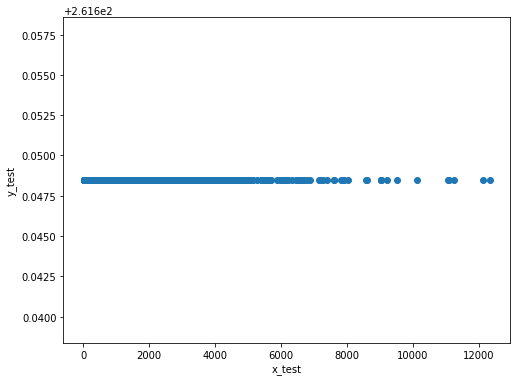

In [13]:
# Step 6e: Plot a scatter plot between y_test and your prediction
plt.figure(figsize=(8,6))
plt.scatter(expect1,predict1)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

### Step 7: Train a LinearRegression
Take note of the DummyRegressor's RMSE that we printed in 6d - that will be our baseline.

We'll start off with a LinearRegression. Same thing as you did with Step 6. 

Additional, plot a straight like where y = x.

In [14]:
# Step 7a: Declare a variable to store the LinearRegression model
model2 = LinearRegression()
# Step 7b: Fit your train dataset
model2.fit(x_train, y_train)

# find the 'slope' of the graph for each attribute that the estimator is using
coeff_df2 = pd.DataFrame(model2.coef_, ind_var.columns, columns = ['Coefficient'])
coeff_df2

,Coefficient
week,-1.341462e-01
checkout_price,5.473234e+11
base_price,-5.473234e+11
emailer_for_promotion,3.441960e+02
homepage_featured,3.184081e+02
...,...
Starters,-1.639016e+07
Continental,3.130980e+10
Indian,2.977099e+10
Italian,3.957057e+10


# Observations from above query
- The table tells us for each attribute, when there is an increase in 1 unit of it, what is the corresponding increase/decrease to the dpd_var. i.e. num_orders in this case
- Eg for every 1 unit increase in Continental, num_orders increase by 3

In [15]:
# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
predict2 = model2.predict(x_test)
expect2 = y_test

#To see the actual predictions by the estimator against the test set
est_df2 = pd.DataFrame({'Actual': y_test, 'Predicted':predict2})
est_df2

,Actual,Predicted
167830,188,87.117653
278395,13,-16.613136
369563,177,411.569054
74201,825,612.899879
43925,55,-68.494850
...,...,...
103702,54,327.094246
100621,188,92.204887
352898,54,15.438744
170003,96,69.436974


# Observations from above query
- There are 91310 data points on the graph
- From the values seen above, we can see the Linear Regressor is actually quite off with many of the predicted values being super far from the actual

In [16]:
# Step 7d: Print the square root of the mean_squared_error between the y test and linear regression prediction
rms2 = np.sqrt(np.mean((predict2-expect2)**2))
rms2

290.77693200587066

In [17]:
df1['num_orders'].mean()

261.8727603669275

# Observations from above query
- RMSE of Linear Regression is >10x higher than 10% of the mean of num_orders from the raw data set. As the higher the RMSE, the more unaccurate, this means that it is super unaccurate.

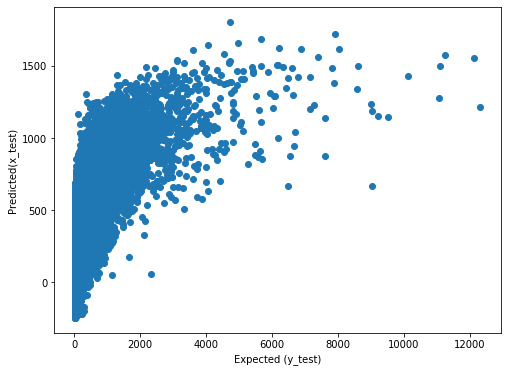

In [18]:
# Step 7e: Plot a scatter plot between y_test and your prediction
plt.figure(figsize = (8,6))
plt.scatter(expect2,predict2)
plt.xlabel('Expected (y_test)')
plt.ylabel('Predicted(x_test)')
plt.show()

### Step 8: Train a DecisionTreeRegressor
Unsurprisingly, LinearRegression doesn't do too well but it's a good start.

Next, you know the drill - let's try a tree-based regressor the DecisionTreeRegressor. Keep an eye on the eventual RMSE.

<strong>From here onwards, the training time may take a while so be patient while the model trains.</strong>

In [19]:
# Step 8: Train and assess a DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
predict3 = model3.predict(x_test)
expect3 = y_test
rms3 = np.sqrt(np.mean((predict3 - expect3)**2))
rms3

200.73931568499478

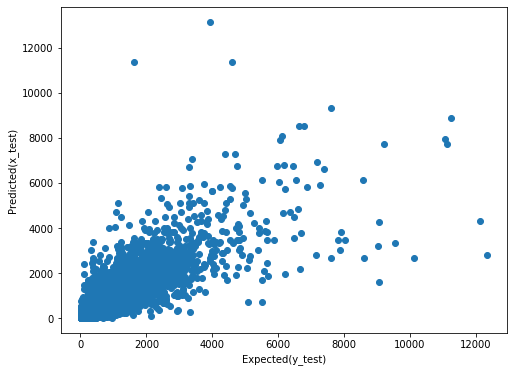

In [20]:
plt.figure(figsize = (8,6))
plt.scatter(expect3,predict3)
plt.xlabel('Expected(y_test)')
plt.ylabel('Predicted(x_test)')
plt.show()

# Observations from above query
- Shape of scatterplot shows that DecisionTreeRegressor predictions seems to be slightly better correlated with expected results
- But RMSE is still 7.5x 10% of num_orders' mean from the raw dataset. 
 - Does this mean it is still a bad estimate? or does this kind of observations only matter for linear regression?

### Step 9: Train a RandomForestRegressor
Let's train a Random Forest regressor next. 

Don't forget to print the RMSE and plot the prediction vs actual values.

In [21]:
# Step 9: Train a RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(x_train,y_train)
predict4 = model4.predict(x_test)
expect4 = y_test
rms4 = np.sqrt(np.mean((predict4 - expect4)**2))
rms4

C:\Users\tianweizheng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


157.67473492137614

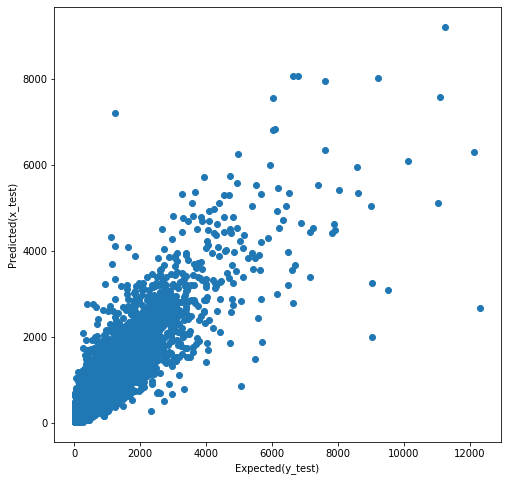

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(expect4,predict4)
plt.xlabel('Expected(y_test)')
plt.ylabel('Predicted(x_test)')
plt.show()

# Observations from above query
- RandomForest seems to be the best out of the 3 in showing correlation
- But RMSE is still 5.6x of 10% of the mean of num_orders

### Step 10: Train other regressors
We have used two of the most popular regressors around, but feel free to try other models as well. 

The idea is to mix them up and see which one does best.

In [24]:
# Step 10: Train another regressor
model5 = GradientBoostingRegressor()
model5.fit(x_train,y_train)
predict5 = model5.predict(x_test)
expect5 = y_test
rms5 = np.sqrt(np.mean((predict5 - expect5)**2))
rms5

230.62133004524352

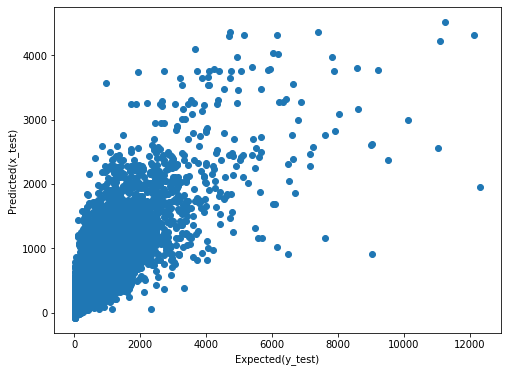

In [26]:
plt.figure(figsize = (8,6))
plt.scatter(expect5,predict5)
plt.xlabel('Expected(y_test)')
plt.ylabel('Predicted(x_test)')
plt.show()

### Step 11: Create a DataFrame with the feature importances of your best model
After training a few models (we hope you did), time to determine the importance of all the features used in your modelling.

Get your model's feature importances, and create a DataFrame. Don't forget to sort, so you can see the top few features used in modelling.

You're looking for something like this:

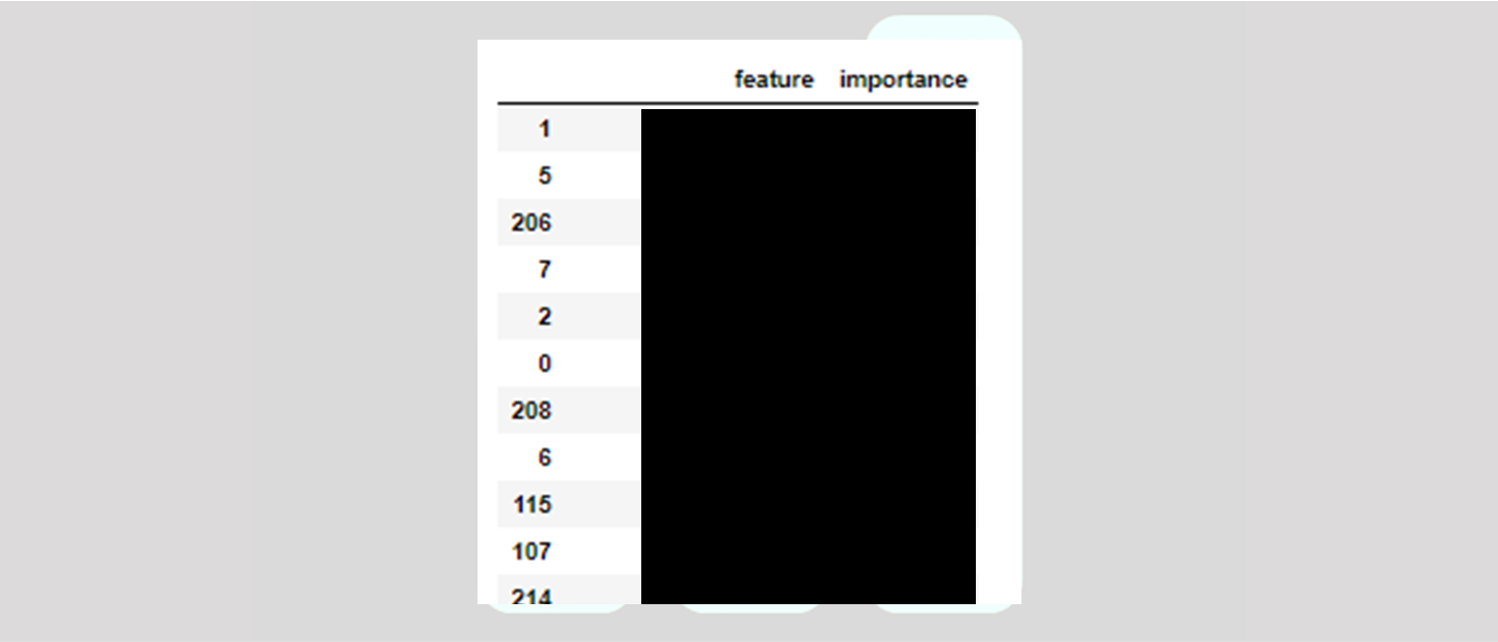

What are the top features for your model, and what can you infer from it?

In [43]:
x_train.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'op_area', 'discounts', 'has_promotions',
       'center_id__10', 'center_id__11',
       ...
       'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters',
       'Continental', 'Indian', 'Italian', 'Thai'],
      dtype='object', length=216)

In [45]:
# Step 11: Create a DataFrame with feature importances
randomForest_impt = pd.DataFrame({'feature':x_train.columns,'importance': model4.feature_importances_})
randomForest_impt.sort_values(by='importance',ascending=False)

,feature,importance
1,checkout_price,0.116370
5,op_area,0.108708
7,has_promotions,0.093728
206,Rice Bowl,0.086824
2,base_price,0.081592
...,...,...
113,meal_id__2126,0.000007
114,meal_id__2139,0.000004
91,meal_id__1247,0.000004
108,meal_id__1902,0.000003


## Approach 2: Modelling the problem as a time-series
As mentioned in the notebook earlier, we were modelling the dataset as a normal ML task. However, there is a chronological element to the dataset, i.e. week. 

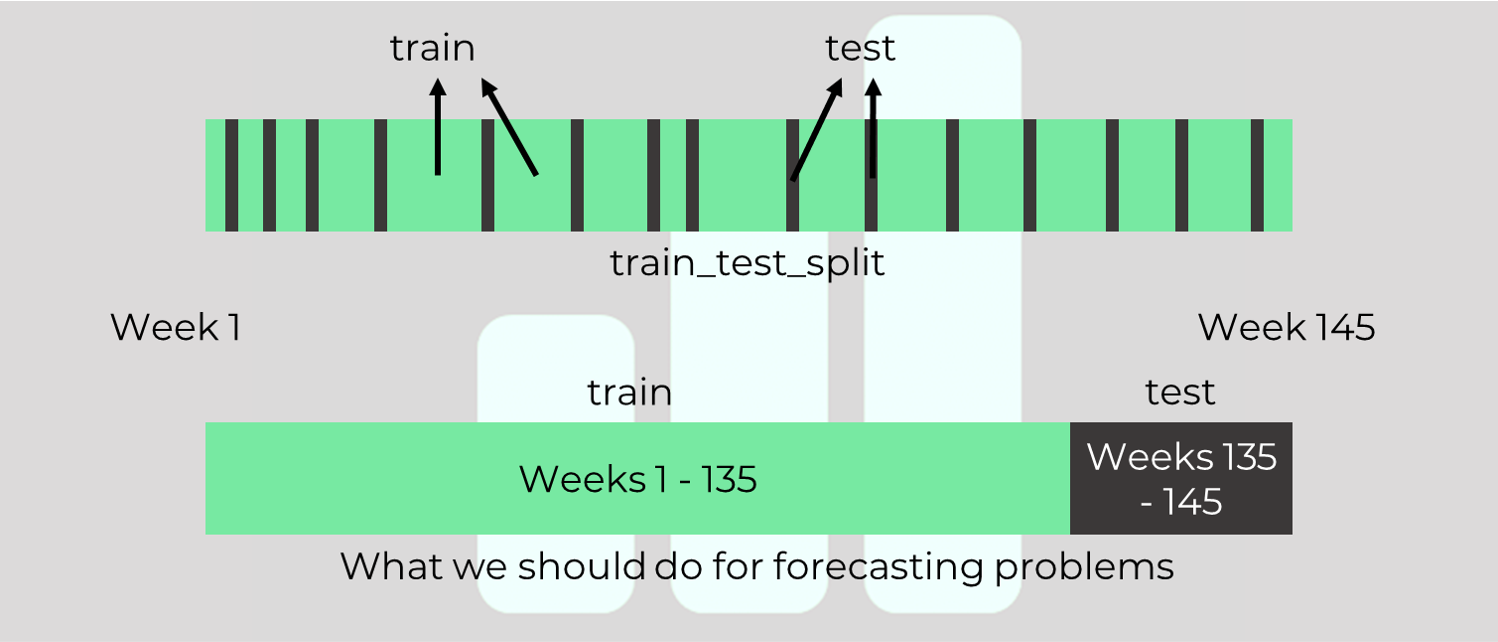

As such, we will split our data differently - we take any dataset from week 1 to 135 as our train dataset, and week 136 to 145 as our test dataset.

### Step 12: Filter your data to have Week 1 - 135 for train
Filter your original DataFrame from Step 2 to have only Weeks 1-135 and assign it to a variable.

You should end up with: 
- 423,727 rows
- 218 columns

<details>
    <summary>Click here once for a hint to find how to filter for a range.</summary>
    <div><strong>Google "filter dataframe by range of values"</strong></div>
</details>

In [88]:
# Step 12: Get DataFrame containing Week 1-135
chrono_train_df = df1[df1['week'] <= 135].copy()
chrono_train_df.shape

(423727, 218)

### Step 13: Filter your data to have Week 136 - 145 for test
Filter your original DataFrame from Step 2 to have only Weeks 136 to 145 and assign it to another variable.

You should end up with: 
- 32,821 rows
- 218 columns

In [89]:
# Step 13: Get DataFrame containing Week 136-145
chrono_test_df = df1[(df1['week'] >= 136) & (df1['week'] <= 145)].copy()
chrono_test_df.shape

(32821, 218)

### Step 14: Prepare train and test dataset 
Similar to Step 3, we will prepare the train and test for training and testing.
1. Train (X) - drop num_orders and total_revenue from Step 12 DataFrame
2. Train (y) - get the num_orders from Step 12 DataFrame
3. Test (X) - drop num_orders and total_revenue from Step 13 DataFrame
4. Test (y) - get the num_orders from Step 13 DataFrame

We are doing these extra steps because the order in the DataFrame is not entirely chronological, i.e. you have rows that do not have "week" in consecutive order.

We <em>could</em> have sorted the DataFrame before this, but this approach is fine too.

In [90]:
# Step 14: Prepare train and test dataset
X_train = chrono_train_df.drop(['num_orders','total_revenue'],axis=1)
X_train.shape

(423727, 216)

In [91]:
X_test = chrono_test_df.drop(['num_orders','total_revenue'],axis=1)
X_test.shape

(32821, 216)

In [92]:
y_train = chrono_train_df['num_orders']
y_train.shape

(423727,)

In [93]:
y_test = chrono_test_df['num_orders']
y_test.shape

(32821,)

### Step 15: Train a LinearRegression
We can jump straight to modelling with a LinearRegression. 

In [94]:
# Find mean of training set
chrono_train_df['num_orders'].mean()

264.5505360762944

In [95]:
# Step 15: Train a LinearRegression
lin_model1= LinearRegression()
lin_model1.fit(X_train,y_train)
lin_predict1 = lin_model1.predict(X_test)
lin_expect1 = y_test

lin_RMSE = np.sqrt(np.mean((lin_predict1 - lin_expect1)**2))
lin_RMSE

191.66977462322623

In [96]:
lin_coeff_df1 = pd.DataFrame(lin_model1.coef_, X_train.columns, columns = ['Coefficient'])
lin_coeff_df1

,Coefficient
week,-1.223180e-01
checkout_price,-3.576382e+07
base_price,3.576382e+07
emailer_for_promotion,3.527425e+02
homepage_featured,3.254368e+02
...,...
Starters,1.134015e+09
Continental,1.663660e+08
Indian,-1.292871e+09
Italian,-3.684069e+08


In [97]:
lin_results_df1 = pd.DataFrame({'Actual':lin_expect1,'predicted':lin_predict1})
lin_results_df1

,Actual,predicted
135,134,560.303506
136,96,557.662169
137,81,556.457628
138,67,559.244141
139,204,558.004361
...,...,...
456543,13,206.741818
456544,42,6.624046
456545,40,4.826417
456546,53,5.448484


# Observations from above query
- RMSE is more than 10x the mean
- WHen comparining the actual vs prediction df, we also see that the predictions are way off
- So Linear regression is not a very good model

### Step 16: Train a few other models
You might realize that LinearRegression doesn't quite cut it, especially for this round. 

Keep going and try a few models and assess their performance.

In [70]:
# Step 16: Try your favorite models
# Decision Tree
tree_model1 = DecisionTreeRegressor()
tree_model1.fit(X_train, y_train)
tree_predict1 = tree_model1.predict(X_test)
tree_expect1 = y_test

tree_RMSE = np.sqrt(np.mean((tree_predict1 - tree_expect1)**2))
tree_RMSE

174.306404579849

In [71]:
tree_results_df1 = pd.DataFrame({'Actual':tree_expect1,'Predicted':tree_predict1})
tree_results_df1

,Actual,Predicted
135,134,216.0
136,96,95.0
137,81,95.0
138,67,231.0
139,204,216.0
...,...,...
456543,13,377.0
456544,42,28.0
456545,40,14.0
456546,53,28.0


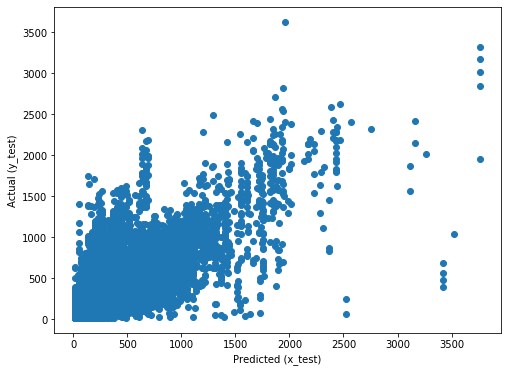

In [73]:
plt.figure(figsize = (8,6))
plt.scatter(x = tree_predict1, y=tree_expect1)
plt.xlabel('Predicted (x_test)')
plt.ylabel('Actual (y_test)')
plt.show()

# Observations from above query
- RMSE is lower than linear regression, but still > 10x higher than mean
- Prediction table is slightly better than linear reg, but still quite off
- Decision Tree Regressor is also not a good model

In [74]:
# Use Random Forest
forest_model1 = RandomForestRegressor()
forest_model1.fit(X_train, y_train)
forest_predict1 = forest_model1.predict(X_test)
forest_expect1 = y_test

forest_RMSE = np.sqrt(np.mean((forest_predict1 - forest_expect1)**2))
forest_RMSE

C:\Users\tianweizheng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


135.05658178127044

In [75]:
forest_result1 = pd.DataFrame({'Actual':forest_expect1, 'Predicted':forest_predict1})
forest_result1

,Actual,Predicted
135,134,169.0
136,96,98.5
137,81,98.5
138,67,160.8
139,204,163.9
...,...,...
456543,13,139.6
456544,42,40.8
456545,40,19.4
456546,53,22.0


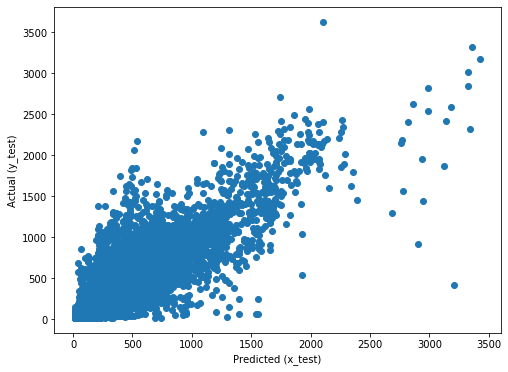

In [76]:
plt.figure(figsize = (8,6))
plt.scatter(x=forest_predict1, y=forest_expect1)
plt.xlabel('Predicted (x_test)')
plt.ylabel('Actual (y_test)')
plt.show()

# Observations from above query
- RMSE is 5x more than 10% of num_orders mean. So this model is double the effectiveness of decision tree
- The 1st 3 points from the dataframe seems to be predicted quite closely to the expected. But thereafter, the predictions diverged very far from the expected. Not sure if this is due to the dataset or because wrong model used?

In [77]:
# Using GradientBoostingRegressor model
grad_model1 = GradientBoostingRegressor()
grad_model1.fit(X_train, y_train)
grad_model_predict1 = grad_model1.predict(X_test)
grad_model_expect1 = y_test

grad_model_rmse1 = np.sqrt(np.mean((grad_model_predict1 - grad_model_expect1)**2))
grad_model_rmse1

160.84765325443507

In [83]:
#Use dataframe to compare how close predicted vs expected results
grad_result1 = pd.DataFrame({'Actual':grad_model_expect1, 'Predicted':grad_model_predict1})
grad_result1

,Actual,Predicted
135,134,400.755546
136,96,400.755546
137,81,400.755546
138,67,400.755546
139,204,400.755546
...,...,...
456543,13,211.661623
456544,42,84.971944
456545,40,84.971944
456546,53,84.971944


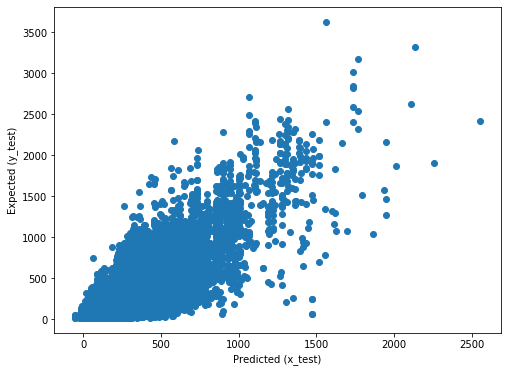

In [80]:
#Show scatterplot
plt.figure(figsize = (8,6))
plt.scatter(x=grad_model_predict1, y=grad_model_expect1)
plt.xlabel('Predicted (x_test)')
plt.ylabel('Expected (y_test)')
plt.show()

# Observations from above query
- RMSE is 6x higher than 10% of the num_orders mean.
- The predicted values are quite far off from the actual results at the start, but seem to better predict the bottom few results.
- But, the predicted values seems to be weird, with multiple of the same values e.g. 400.755
- Seems like RandomForestRegressor is the best model we have

### Step 17: Construct a DataFrame with feature importances
Create a DataFrame with your model's feature importances with your best performing model.

Compare this DataFrame with the one that you got from Step 11.

What are the things that you see in both DataFrames?

In [86]:
# Step 17: Create a DataFrame with feature importances from your best performing model
randomForest_impt2 = pd.DataFrame({'Feature':X_train.columns,'Importance':forest_model1.feature_importances_})
randomForest_impt2.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,checkout_price,0.119137
5,op_area,0.106579
7,has_promotions,0.096919
206,Rice Bowl,0.094386
2,base_price,0.079357
...,...,...
113,meal_id__2126,0.000008
121,meal_id__2492,0.000006
91,meal_id__1247,0.000003
108,meal_id__1902,0.000003


# Observations from above query
- Aside from 'meal_id_2492' replacing 'meal_id_2139' in the bottom 4, the ranking list is the same
- The importance scores are also very similar with Step 11, usually a difference <= 0.2

## Assessing model performance in predicting aggregated num_orders
Depending on how you see it, the model you trained may or may not be as satisfying as you think. Previously, we've only trained and predicted for individual orders. 

What if we combined all of our num_orders predictions together into a week-level aggregate? 

### Step 18: Create a new column 'prediction' with your model prediction
Next up, let's plot our predictions again the actual num_orders in Week 136 - 145.

Before that, let's create a new column called 'prediction' in the DataFrame you got from Step 13.

To check, at the end you'll have:
1. 32,821 rows
2. 219 columns

In [101]:
# Step 18: Add predicton to the DataFrame from Step 13
chrono_test_df2 = df1[(df1['week'] >= 136) & (df1['week'] <=145)].copy()
chrono_test_df2.head(2)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotions,...,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai
135,136,148.44,148.44,0,0,134,2.0,19890.96,0.0,0,...,0,0,0,0,0,0,0,0,0,1
136,137,153.29,154.29,0,0,96,2.0,14715.84,1.0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
chrono_test_df2 = chrono_test_df2.join(forest_result1['Predicted'])
chrono_test_df2.head(2)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,total_revenue,discounts,has_promotions,...,Salad,Sandwich,Seafood,Soup,Starters,Continental,Indian,Italian,Thai,Predicted
135,136,148.44,148.44,0,0,134,2.0,19890.96,0.0,0,...,0,0,0,0,0,0,0,0,1,169.0
136,137,153.29,154.29,0,0,96,2.0,14715.84,1.0,0,...,0,0,0,0,0,0,0,0,1,98.5


### Step 19: Perform a groupby operation by week on DataFrame from Step 18
Now that we've added a new column, let's perform a groupby operation by week, and sum up num_orders and prediction.

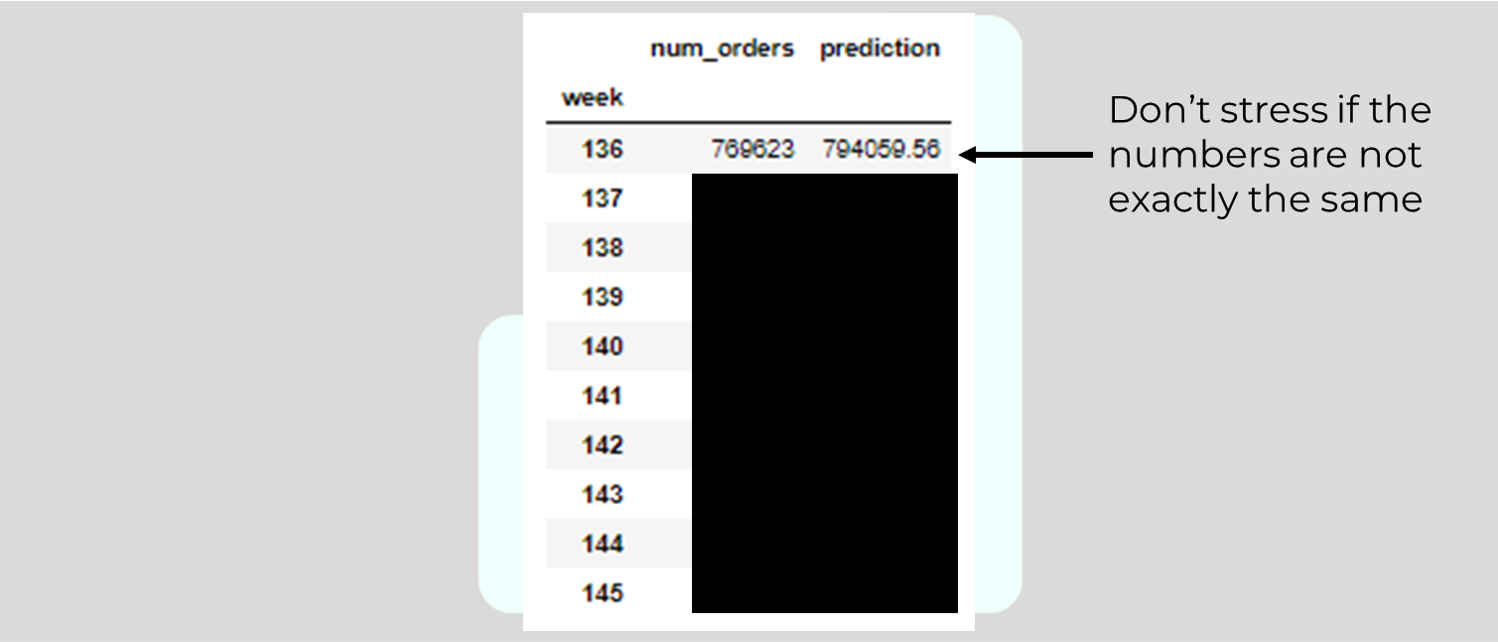

This will give us a DataFrame that contains:
1. 10 rows
2. 2 columns

Don't fret if you don't get the exact same numbers for prediction.

In [126]:
# Step 19: Perform a groupby operation by week for Step 18 DataFrame, and sum up num_orders and prediction
weekly_test_df = chrono_test_df2.groupby('week')['num_orders','Predicted'].sum()
weekly_test_df

,num_orders,Predicted
week,,
136,769623,795020.7
137,719740,758670.0
138,667343,723124.8
139,751935,738537.3
140,802689,763478.0
141,776240,727504.5
142,739661,727238.5
143,759926,719505.6
144,801197,806842.5


### Step 20: Perform a groupby operation by week on DataFrame from Step 12
Let's perform a groupby operation by week on the DataFrame that we got from Step 12, and just sum up 'num_orders'.

You'll have a DataFrame that has:
1. 135 rows
2. 1 column

In [122]:
# Step 20: Perform a groupby operation by week for Step 12 DataFrame, and sum up num_orders
weekly_train_df = chrono_train_df.groupby('week')['num_orders'].sum()
weekly_train_df

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
131     899953
132     939374
133     835583
134     975072
135     777106
Name: num_orders, Length: 135, dtype: int64

### Step 21: Plot train, test, and prediction
Final test of the prediction - plotting them together and visually inspecting it.

In the same plot, plot:
1. summed num_orders (from Step 20 DataFrame)
2. summed num_orders (from Step 19 DataFrame)
3. summed predictions (from Step 19 DataFrame)

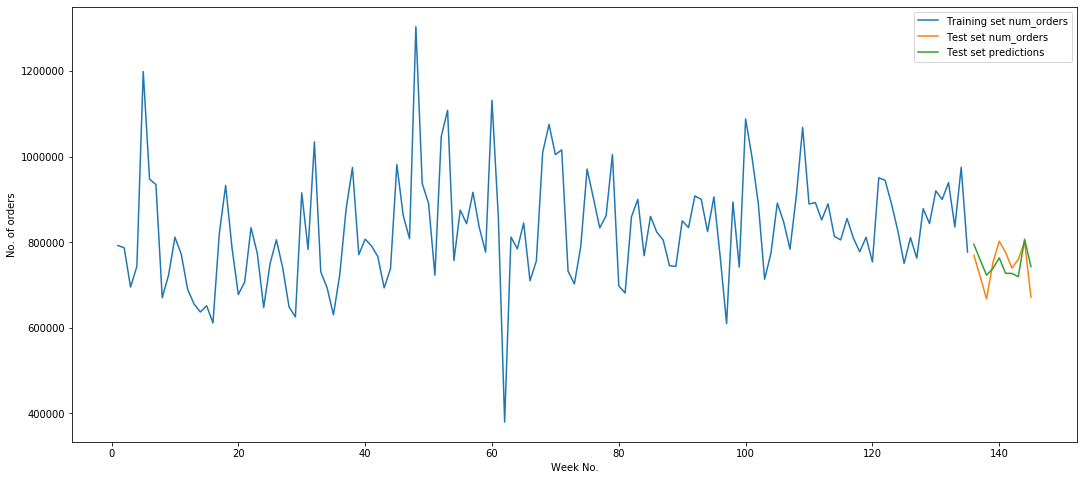

In [127]:
# Step 21: Plot your time-series data
plt.figure(figsize = (18,8))
plt.plot(weekly_train_df, label = 'Training set num_orders')
plt.plot(weekly_test_df['num_orders'], label = 'Test set num_orders')
plt.plot(weekly_test_df['Predicted'], label = 'Test set predictions')
plt.xlabel('Week No.')
plt.ylabel('No. of orders')
plt.legend()
plt.show()

<details>
    <summary>What'd you think? Did the model perform well on an aggregate level?</summary>
    <div><img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectFoodRetail/NumOrdersTimeSeries.png"></div>
    <div><strong>Looks like the model does well on the aggregate level, and the weekly predictions look fine.</strong></div>
</details>

# The end
You did it! You've arrived at the end. Congratulations and well done on completing this project series! 

Let's review.
1. In Part I, you collected the datasets and combined them to form a single DataFrame
2. In Part II, you performed exploratory data analysis on the dataset, investigating distributions and relationships found between features 
3. In Part III, you explored the dataset even further to ask pertinent business-centric questions 
4. In Part IV, you engineered features from the dataset in preparation for model building
5. In Part V, you trained a machine learning model that can predict number of orders placed each week. In addition, you modelled the problem as a time-series as well

That's a lot of work done.

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG